In [1]:
import pandas as pd
import os

In [3]:
# load the file and remove useless thing
data_path = './data/text.csv'
if os.path.exists(data_path):
    data = pd.read_csv(data_path)

data = data.drop(data.columns[0], axis=1)
text = data.text
sentiment = data.label
data[:5]

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [80]:
print('We have {} NaN/Null values in test'.format(data.isnull().values.sum()))

We have 0 NaN/Null values in test


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


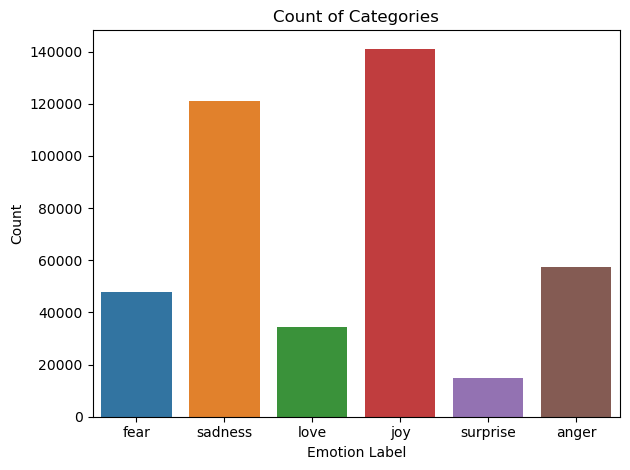

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

sentiment_text = sentiment.map(emotion_map)

sns.countplot(sentiment_text)
plt.title('Count of Categories')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("./images/Count of Categories.png")
plt.show()

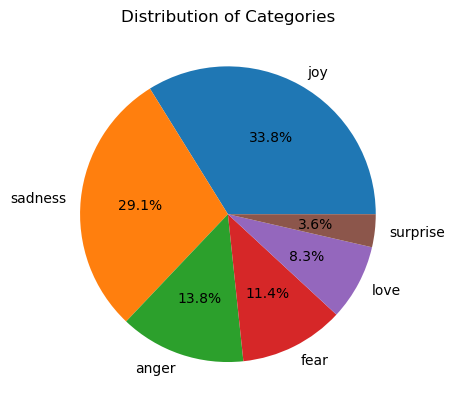

In [5]:
count = sentiment_text.value_counts()
plt.pie(count, autopct='%1.1f%%', labels=count.index)
plt.title('Distribution of Categories')
plt.savefig("./images/Distribution of Categories.png", bbox_inches = "tight")
plt.show()

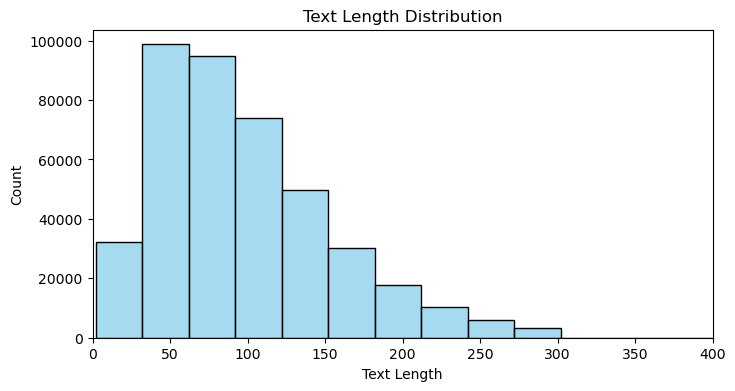

In [6]:
length = text.apply(len)
plt.figure(figsize=(8,4))
sns.histplot(length, binwidth=30, color='skyblue')
plt.title('Text Length Distribution')
plt.xlim(0, 400)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.savefig("./images/Text Length Distribution.png", bbox_inches = 'tight')
plt.show()

In [7]:
import pandas as pd
from bs4 import BeautifulSoup
import nltk
import re
from nltk.tokenize import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer, PorterStemmer

# preprocessing
def run_preprocessing(text):
    tokenizer = ToktokTokenizer()
    stopword_list = stopwords.words('english')

    # Match and remove noisy text
    text = BeautifulSoup(text, 'html.parser').get_text() # remove html signal like <br><\br>
    text = re.sub(r'\b\w*@\w+\b', '', text) # remove unstructure words like @username, F@ck
    text = re.sub(r'http.*', '', text) # remove website http...
    text = re.sub(r'\[[^]]\]', '', text) # remove square brackets: [....]
    text = re.sub(r'[^\s\w]', '', text) # remove special characters: @#&*()
    text = re.sub(r'\d+', '', text) # remove numerical digits

    # Tokenize and remove stopwords
    tokens = tokenizer.tokenize(text)
    filter_tokens = [token for token in tokens if token.lower() not in stopword_list]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(filter_token) for filter_token in filter_tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(stemmed_token) for stemmed_token in stemmed_tokens]

    return ' '.join(lemmatized_tokens)

In [10]:
from wordcloud import WordCloud
import numpy as np

text_preprocessed = text.apply(run_preprocessing)
new_data = pd.DataFrame({
    'text': text_preprocessed,
    'label': sentiment_text
})
new_data

,text,label
0,feel realli helpless heavi heart,fear
1,ive enjoy abl slouch relax unwind frankli need...,sadness
2,gave internship dmrg feel distraught,fear
3,dont know feel lost,sadness
4,kindergarten teacher thoroughli weari job take...,fear
...,...,...
416804,feel like tell horni devil find site suit sort...,love
416805,began realiz feel agit restless would thought ...,anger
416806,feel curiou previou earli dawn time seek troubl,surprise
416807,feel becuas tyran natur govern el salvador sav...,anger


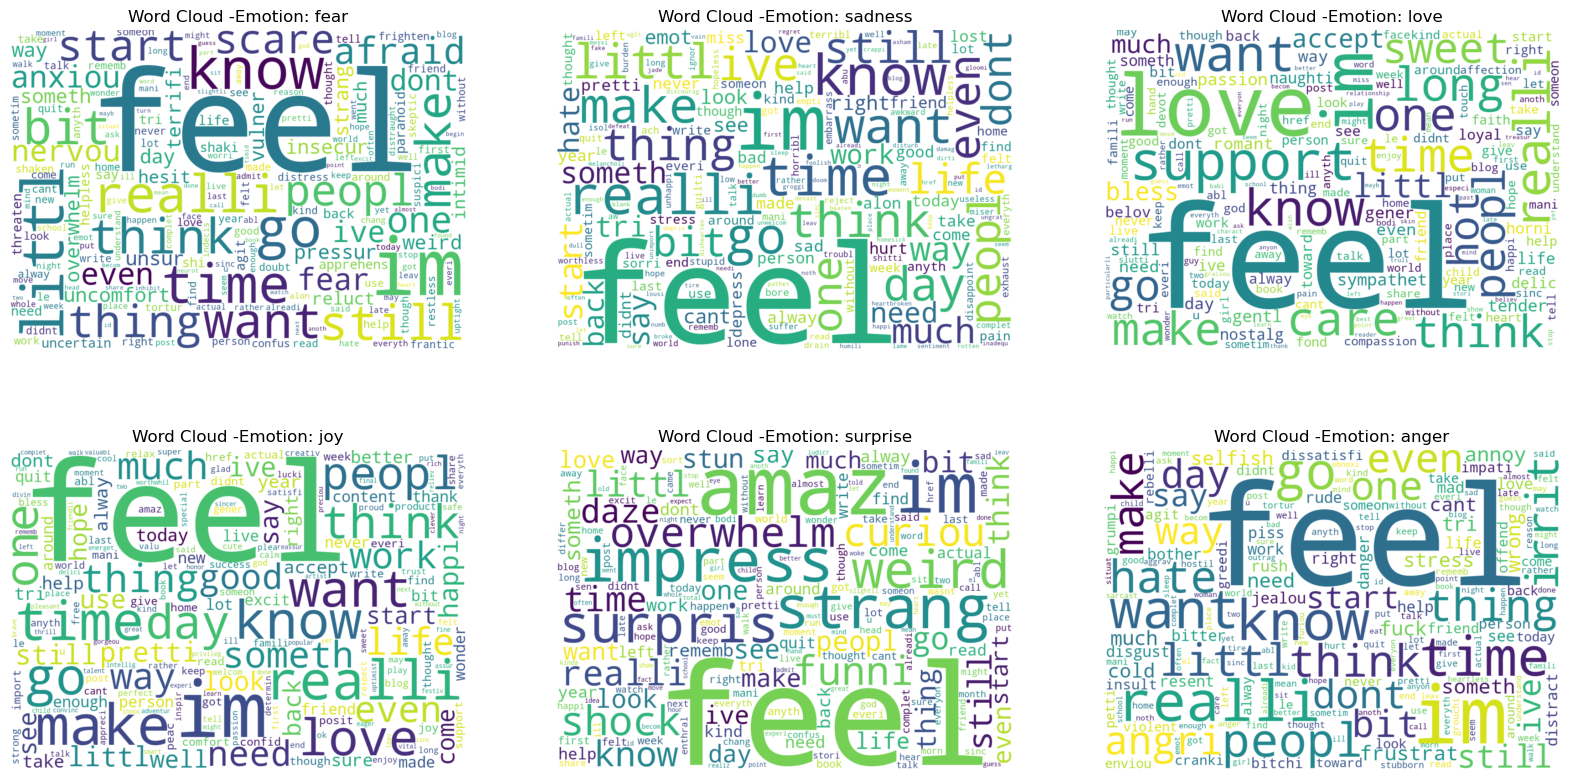

In [75]:
# word cloud
sentiments_label = new_data['label'].unique()
plt.figure(figsize=(20, 10))
for i, sentiment in enumerate(sentiments_label):
    subset  = new_data[new_data['label'] == sentiment]
    subset_text = ' '.join(subset['text'])
    wc = WordCloud(width=1000, height=700, background_color='white', collocations=False).generate(subset_text)
    plt.subplot(2,3,i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud -Emotion: {sentiment}")
    plt.axis('off')
plt.savefig("./images/Word Cloud.png", bbox_inches = 'tight')
plt.show()